### Asignacion Final del Modulo 6

**Programa de MÁSTER EN DATA SCIENCE Y BUSINESS ANALYTICS**

**Módulo 6 - Aprendizaje Automatico**

**Estudiante:** Richard Douglas Grijalba

**Información relevante del ejercicio a desarrollar**


**Detalles sobre el dataset**      el archivo : *online_shoppers_intention*  se utiliza el proporsionado por IMF segun: Los datos se han obtenido de la siguiente web, aunque se pueden descargar de la plataforma de IMF Business School.


1.	El conjunto de datos consta de diez atributos numéricos y ocho categóricos.
2.	El atributo revenue puede ser usado como la etiqueta de la clase.
3.	Administrative , administrative duration , informational, informational duration , product related y product related duration representan el número de diferentes tipos de páginas visitadas por el visitante en esa sesión y el tiempo total dedicado a cada una de estas categorías de páginas. Los valores de estas características se derivan de la información del URL de las páginas visitadas por el usuario y se actualizan en tiempo real cuando el usuario realiza una acción, por ejemplo, pasar de una página a otra.

4.	Las características bounce rate , exit rate y page value representan las métricas medidas por Google Analytics para cada página del sitio de comercio electrónico. El valor de la característica bounce rate de una página web se refiere al porcentaje de visitantes que entran en el sitio desde esa página y luego salen (rebote) sin activar ninguna otra solicitud al servidor de análisis durante esa sesión.   El valor de la característica exit rate para una página web específica se calcula como para todas las visitas a la página, el porcentaje que fueron las últimas en la sesión.  La función Page Value representa el valor medio de una página web que un usuario ha visitado antes de completar una transacción de comercio electrónico.

5.	La característica de special day indica la cercanía de la hora de visita del sitio a un día especial específico (por ejemplo, el Día de la Madre, San Valentín) en el que es más probable que las sesiones finalicen con una transacción. El valor de este atributo se determina teniendo en cuenta la dinámica del comercio electrónico, como la duración entre la fecha del pedido y la fecha de entrega. Por ejemplo, para San Valentín, este valor toma un valor distinto de 0 entre el 2 y el 12 de febrero, 0 antes y después de esta fecha a menos que esté cerca de otro día especial, y su valor máximo de 1 el 8 de febrero.

6.	El conjunto de datos también incluye el sistema operativo, el navegador, la región, el tipo de tráfico, el tipo de visitante como visitante que regresa o como nuevo visitante, un valor booleano que indica si la fecha de la visita es de fin de semana, y el mes del año.


**Se pide resolver:**

1.	Realización de un análisis de las variables del dataset de Google Analytics como pueden ser histogramas, boxplots, etc. Cualquier otro análisis es bienvenido, siempre explicándolo y con un sentido de negocio.

2.	Tratamiento de los valores faltantes, outliers, etc., en caso de que los hubiese. Si hay valores con missings, habrá que eliminarlos con el método de Pandas llamado Dropna().a.
3.	Tratamiento de categóricas, pasándolas a numéricas por medio de dummies, mapeándolas o utilizando un label encoder. Hay que justificar las operaciones que se realizan.
4.	Si existe alguna variable que se necesite borrar, habrá que borrara y justificarlo.
5.	Estandariza los datos.
6.	Dividir los datos en train y en test. Con los datos de train se pretende ajustar modelos con CrossValidation y GridSearch.

    •	Utilizar un modelo lineal. Entre los modelos lineales están las regresiones logísticas, las regresiones lineales, etc.
    
    •	Utilizar un modelo de redes neuronales.
    
    •	Utilizar cualquier otro modelo de clasificación.
7.	Optimizar algún parámetro de cada modelo utilizando CrossValidation y GridSearch, o de la forma que se estime oportuna, siempre justificándolo.
8.	Elegir el mejor modelo de los tres según la métrica ROC en CrossValidation. Predecir Test y obtener una métrica estimada.
9.	Umbralizar las probabilidades utilizando el umbral que maximice el área bajo la curva ROC.
10.	El entregable final será un Jupyter Notebook en el que se realicen todos los análisis y los modelos.


**Carga de las librerias**


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.metrics as metrics
from IPython.core.display import display, HTML
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

C:\Users\Rdouglas\AppData\Local\Temp\ipykernel_8500\306533062.py:9: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


**Definición de funciones:**  Esta funcion fue proporcionada durante el desarrollo de uno de los casos practicos, la cual es muy util para facilitar la generacion de los graficos


In [2]:
def relaciones_vs_target(X, Y, return_type='axes'):
    '''
    Función que representa gráficos de dispersión de las variables
    en X en función a la variable Y
    '''
    fig_tot = (len(X.columns))
    fig_por_fila = 5
    tamanio_fig = 4
    num_filas = int( np.ceil(fig_tot/fig_por_fila) )    
    plt.figure( figsize=( fig_por_fila*tamanio_fig+5, num_filas*tamanio_fig+5 ) )
    c = 0 
    for i, col in enumerate(X.columns):
        plt.subplot(num_filas, fig_por_fila, i+1)
        sns.scatterplot(x=X[col], y=Y)
        plt.title( '%s vs %s' % (col, 'target') )
        plt.ylabel('Target')
        plt.xlabel(col)
    plt.show()

def represento_doble_hist(x_1, x_0, n_bins=11, title='', label_1='Clase 1', 
                          label_0='Clase 0', density=0):
    '''
    Función que recibe dos distribuciones de probabilidad y las representa
    en el mismo gráfico
    '''
    bins = n_bins
    plt.hist(x_1, bins, density = density, alpha=0.5, label=label_1, color='red')    
    plt.hist(x_0, bins, density = density, alpha=0.5, label=label_0, color='green')
    plt.title(title)
    plt.legend(loc='best') 

def hist_pos_neg_feat(x, y, density=0, nbins=11, targets=(0,1)):
    '''
    Representa las variables en x divididas en dos distribuciones
    según su valor de y sea 1 o 0
    '''
    fig_tot = len(x.columns)
    fig_tot_fila = 4; fig_tamanio = 4
    num_filas = int( np.ceil(fig_tot/fig_tot_fila) )
    plt.figure( figsize=( fig_tot_fila*fig_tamanio+2, num_filas*fig_tamanio+2 ) )
    target_neg, target_pos = targets
    for i, feat in enumerate(x.columns):
        plt.subplot(num_filas, fig_tot_fila, i+1);
        plt.title('%s' % feat)
        idx_pos = y == target_pos
        idx_neg= y == target_neg
        represento_doble_hist(x[feat][idx_pos].values, x[feat][idx_neg].values, nbins, 
                   density = density, title=('%s' % feat))

**Carga del dataset**

In [3]:
df=pd.read_csv('C:/Users/Rdouglas/Final ML IMF/online_shoppers_intention.csv')

**Exploracion inicial de los datos**

In [4]:
#vamos a mostrar como se ven los datos en el dataset

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
print(u'- El número de filas en el dataset es: {}'.format(df.shape[0]))
print(u'- El número de columnas en el dataset es: {}'.format(df.shape[1]))
print(u'- El tamaño dataset es: {}'.format(df.size))

- El número de filas en el dataset es: 12330
- El número de columnas en el dataset es: 18
- El tamaño dataset es: 221940


In [6]:
print(u'- Los nombres de las variables son: {}'.format(list(df.columns)))

- Los nombres de las variables son: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']


**Caracteristicas del Dataset** Descripcion general, informacion que describe los datos

El conjunto de datos contiene las siguientes caracteristicas:

* Administrative: El número de páginas administrativas visitadas por el usuario.
* Administrative Duration: La duración total de tiempo (en segundos) que el usuario pasó en páginas administrativas.
* Informational: El número de páginas informativas visitadas por el usuario.
* Informational Duration: La duración total de tiempo (en segundos) que el usuario pasó en páginas informativas.
* Product Related: El número de páginas relacionadas con productos visitadas por el usuario.
* Product Related Duration: La duración total de tiempo (en segundos) que el usuario pasó en páginas relacionadas con productos.
* Bounce Rate: El porcentaje de visitas de una sola página (visitantes que salieron inmediatamente).
* Exit Rate: El porcentaje de visitas que terminaron en esa página.
* Page Value: El valor promedio de una página vista antes de que el usuario abandone el sitio.
* Special Day: Indica la proximidad del tiempo de visita del sitio web a un día especial (por ejemplo, el Día de San Valentín, la Navidad).
* Month: El mes de la visita.
* Operating System: El sistema operativo del usuario.
* Browser: El navegador utilizado por el usuario.
* Region: La región del usuario.
* Traffic Type: El tipo de tráfico (por ejemplo, tráfico directo, motor de búsqueda).
* Visitor Type: El tipo de visitante (nuevo, recurrente).
* Weekend: Indica si la visita ocurrió en un fin de semana o no.
* Revenue: La variable objetivo que indica si el usuario realizó una compra o no (True/False).

**Informacion Resumen de la composicion de los datos**

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12316.0,2.317798,3.322754,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12316.0,80.906176,176.860432,-1.0,0.000000,8.000000,93.500000,3398.750000
Informational,12316.0,0.503979,1.270701,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12316.0,34.506387,140.825479,-1.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12316.0,31.763884,44.490339,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12316.0,1196.037057,1914.372511,-1.0,185.000000,599.766190,1466.479902,63973.522230
BounceRates,12316.0,0.022152,0.048427,0.0,0.000000,0.003119,0.016684,0.200000
ExitRates,12316.0,0.043003,0.048527,0.0,0.014286,0.025124,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


**El tipo de datos segun cada caracteristica:** 

In [8]:
df.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

**Preprocesamiento de datos**

* Revision de nulos
* Revision de datos N/A
* Revision del tipo de datos
* Revision de las Caracteristicas en general


In [10]:
df.isnull().sum()  # se observa la presencia de valores nulos 

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

Opciones para imputar los valores nulos en un dataset: la forma de elegir el valor que va completar el valor nulo no puede ser seleccionado de forma a gusto propio, se procede a elegir o seguir alguna recomendacion segun:

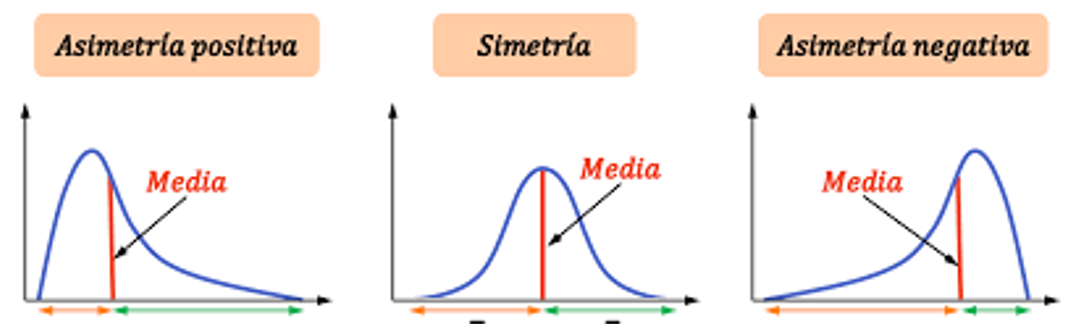




* En el caso de una distribucion con un comportamiento Simetrico se toma el valor de la  **Media**
* En el caso de una distribucion con comportamiento Asimetrico se toma el valor de la **Mediana**
* En el caso de alguna caracteristica de tipo categorica se utiliza la **Moda**

La forma de completar los datos nulos o faltantes es la siguiente:

df['nombre_columna'] = df['nombre_columna'].fillna(valor)

**Procede a Graficar los Histogramas**

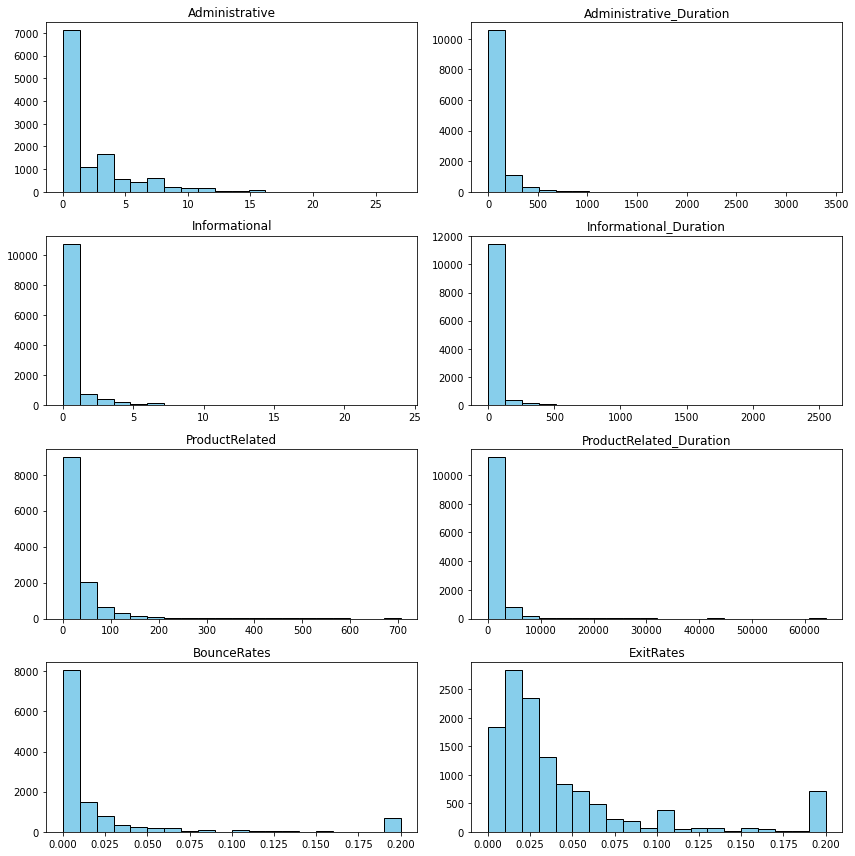

In [11]:
# Crear una figura y ejes para los 8 histogramas
fig, axs = plt.subplots(4, 2, figsize=(12, 12))

# Nombres de las columnas
columnas = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
            'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates']

# Iterar sobre cada columna y crear un histograma en el eje correspondiente
for i, columna in enumerate(columnas):
    fila = i // 2
    columna_grafico = i % 2
    axs[fila, columna_grafico].hist(df[columna], bins=20, color='skyblue', edgecolor='black')
    axs[fila, columna_grafico].set_title(columna)

# Ajustar el diseño de los subgráficos
plt.tight_layout()
plt.show()

In [12]:
# Seleccionar las columnas específicas
columnas_seleccionadas = ['Administrative', 'Administrative_Duration', 'Informational',
                          'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                          'BounceRates', 'ExitRates']

# Obtener el resumen estadístico
resumen_estadistico = df[columnas_seleccionadas].describe()

print(resumen_estadistico)

       Administrative  Administrative_Duration  Informational  \
count    12316.000000             12316.000000   12316.000000   
mean         2.317798                80.906176       0.503979   
std          3.322754               176.860432       1.270701   
min          0.000000                -1.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 8.000000       0.000000   
75%          4.000000                93.500000       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12316.000000    12316.000000             12316.000000   
mean                34.506387       31.763884              1196.037057   
std                140.825479       44.490339              1914.372511   
min                 -1.000000        0.000000                -1.000000   
25%                  0.000000        7.00000

Basados en los resultados se va a proceder a imputar los valores nulos por el valor de mediana de cada caracteristica, en vista que las distribuciones tienen un comportamiento similar o parecen del tipo asimetrico.

In [13]:
# Seleccionar las columnas específicas
columnas_seleccionadas = ['Administrative', 'Administrative_Duration', 'Informational',
                          'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                          'BounceRates', 'ExitRates']

# Obtener el valor de la mediana para cada columna
mediana_por_columna = df[columnas_seleccionadas].median()

print(mediana_por_columna)

Administrative               1.000000
Administrative_Duration      8.000000
Informational                0.000000
Informational_Duration       0.000000
ProductRelated              18.000000
ProductRelated_Duration    599.766190
BounceRates                  0.003119
ExitRates                    0.025124
dtype: float64


In [14]:
# Seleccionar las columnas específicas
columnas_seleccionadas = ['Administrative', 'Administrative_Duration', 'Informational',
                          'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                          'BounceRates', 'ExitRates']

# Calcular la mediana para cada columna seleccionada
mediana_por_columna = df[columnas_seleccionadas].median()

# Rellenar los valores nulos con la mediana correspondiente en cada columna
for columna in columnas_seleccionadas:
    df[columna] = df[columna].fillna(mediana_por_columna[columna])

# Verificar que ya no haya valores nulos en esas columnas
print(df[columnas_seleccionadas].isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
dtype: int64


**Categóricas a numéricas:**


In [15]:
df.select_dtypes(exclude=['number']).columns

Index(['Month', 'VisitorType', 'Weekend', 'Revenue'], dtype='object')

In [16]:
# realizar los cambios o transformaciones de las variables
valores_mes = df['Month'].unique()
valores_tipo_visita = df['VisitorType'].unique()
valores_revenue = df['Revenue'].unique()
valores_fin_de_semana = df['Weekend'].unique()

# Imprimir los valores únicos de cada columna
print("Valores únicos de la columna 'Month':", valores_mes)
print("Valores únicos de la columna 'VisitorType':", valores_tipo_visita)
print("Valores únicos de la columna 'Revenue':", valores_revenue)
print("Valores únicos de la columna 'Weekend':", valores_fin_de_semana)

Valores únicos de la columna 'Month': ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
Valores únicos de la columna 'VisitorType': ['Returning_Visitor' 'New_Visitor' 'Other']
Valores únicos de la columna 'Revenue': [False  True]
Valores únicos de la columna 'Weekend': [False  True]


In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
 # se llama el encoder 
lb_encoder = LabelEncoder()

In [19]:
#antes de realizar esta transformacion se va a realizar una copia del dataset en adelante el codificado sera df1
df1 = df.copy()

In [20]:
df1.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False


In [21]:
# trabajar los meses

orden_meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Crear una instancia de LabelEncoder con el orden especificado
lb_encoder_meses = LabelEncoder()
lb_encoder_meses.fit(orden_meses)

# Aplicar la codificación de etiquetas a la columna 'Month' usando el orden de los meses
df1['Month'] = lb_encoder_meses.transform(df1['Month'])

In [22]:
# Definir un diccionario de mapeo para las categorías 'Returning_Visitor', 'New_Visitor' y 'Other'
mapeo_visitors = {'Returning_Visitor': 0, 'New_Visitor': 1, 'Other': 2}

# Aplicar el mapeo a la columna 'VisitorType'
df1['VisitorType'] = df1['VisitorType'].map(mapeo_visitors)

# Verificar los resultados
print(df1['VisitorType'].unique())

[0 1 2]


In [23]:
# Codificar las categorías 'Weekend' y 'Revenue'
df1['Weekend'] = lb_encoder.fit_transform(df1['Weekend'])
df1['Revenue'] = lb_encoder.fit_transform(df1['Revenue'])

# Verificar los resultados
print("Valores únicos de 'Weekend':", df1['Weekend'].unique())
print("Valores únicos de 'Revenue':", df1['Revenue'].unique())

Valores únicos de 'Weekend': [0 1]
Valores únicos de 'Revenue': [0 1]


In [24]:
valores_mes = df1['Month'].unique()
valores_tipo_visita = df1['VisitorType'].unique()
valores_revenue = df1['Revenue'].unique()
valores_fin_de_semana = df1['Weekend'].unique()

# Imprimir los valores únicos de cada columna
print("Valores únicos de la columna 'Month':", valores_mes)
print("Valores únicos de la columna 'VisitorType':", valores_tipo_visita)
print("Valores únicos de la columna 'Revenue':", valores_revenue)
print("Valores únicos de la columna 'Weekend':", valores_fin_de_semana)

Valores únicos de la columna 'Month': [ 3  7  8 10  6  5  1  9 11  2]
Valores únicos de la columna 'VisitorType': [0 1 2]
Valores únicos de la columna 'Revenue': [0 1]
Valores únicos de la columna 'Weekend': [0 1]


In [25]:
df1.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int32
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                      int64
Revenue                      int64
dtype: object

**Dividir el Dataset entre las caracteristicas X, vs la caracteristica Target**

In [26]:
X = df1.drop('Revenue', axis=1)
Y = df1['Revenue']

**Obersevar el contenido de la variable Objetivo**

In [27]:
Y.value_counts()  # 0 false   1 true

0    10422
1     1908
Name: Revenue, dtype: int64

### **Visualizaciones y correlaciones**


**Descriptivos básicos:**


In [28]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.316302,3.321163,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.823396,176.777041,-1.0,0.000000,8.000000,93.256250,3398.750000
Informational,12330.0,0.503406,1.270093,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.467207,140.750298,-1.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.748256,44.467488,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1195.360026,1913.390668,-1.0,185.287500,599.766190,1464.157214,63973.522230
BounceRates,12330.0,0.022131,0.048404,0.0,0.000000,0.003119,0.016667,0.200000
ExitRates,12330.0,0.042982,0.048503,0.0,0.014286,0.025124,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [29]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.316302,3.321163,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.823396,176.777041,-1.0,0.000000,8.000000,93.256250,3398.750000
Informational,12330.0,0.503406,1.270093,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.467207,140.750298,-1.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.748256,44.467488,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1195.360026,1913.390668,-1.0,185.287500,599.766190,1464.157214,63973.522230
BounceRates,12330.0,0.022131,0.048404,0.0,0.000000,0.003119,0.016667,0.200000
ExitRates,12330.0,0.042982,0.048503,0.0,0.014286,0.025124,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [30]:
X.columns  # esto nos muestra el nombre de las columnas que pertenecen al nuevo conjunto X

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')

In [31]:
X.dtypes  # nos muesta el tipo de datos que contiene el conjunto X

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int32
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                      int64
dtype: object

**Boxplots** :  En este caso se busca determinar si tenemos o no datos *outliers* valores que se comportan de forma peculiar en relacion a los demas, son valores que se alejan mucho de la media.

In [32]:
X_normalizado = (X-X.mean())/X.std()  # se procede a normalizar los datos

In [33]:
X_normalizado[:2]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,-0.697437,-0.457205,-0.396354,-0.244882,-0.691477,-0.624734,3.674689,3.237248,-0.317165,-0.308809,-1.46127,-1.233376,-0.790261,-0.894142,-0.762598,-0.401009,-0.550529
1,-0.697437,-0.457205,-0.396354,-0.244882,-0.668989,-0.591285,-0.457212,1.175540,-0.317165,-0.308809,-1.46127,-0.136073,-0.207943,-0.894142,-0.514161,-0.401009,-0.550529


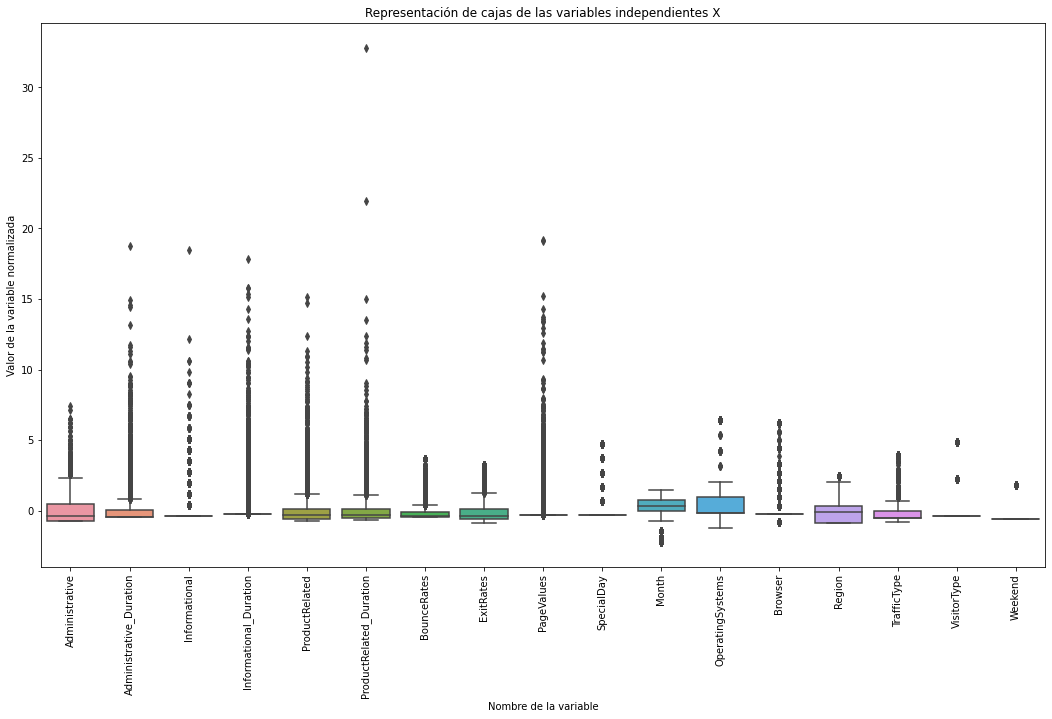

In [34]:
#Se generan los graficos de caja/bigotes  Boxplots para ver los datos
plt.figure(figsize=(18,10))
ax = sns.boxplot(data=X_normalizado)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title(u'Representación de cajas de las variables independientes X')
plt.ylabel('Valor de la variable normalizada')
_ = plt.xlabel('Nombre de la variable')

**Histogramas:**

Procedemos a mostar de forma grafica por medio de histogramas la distribucion de los valores


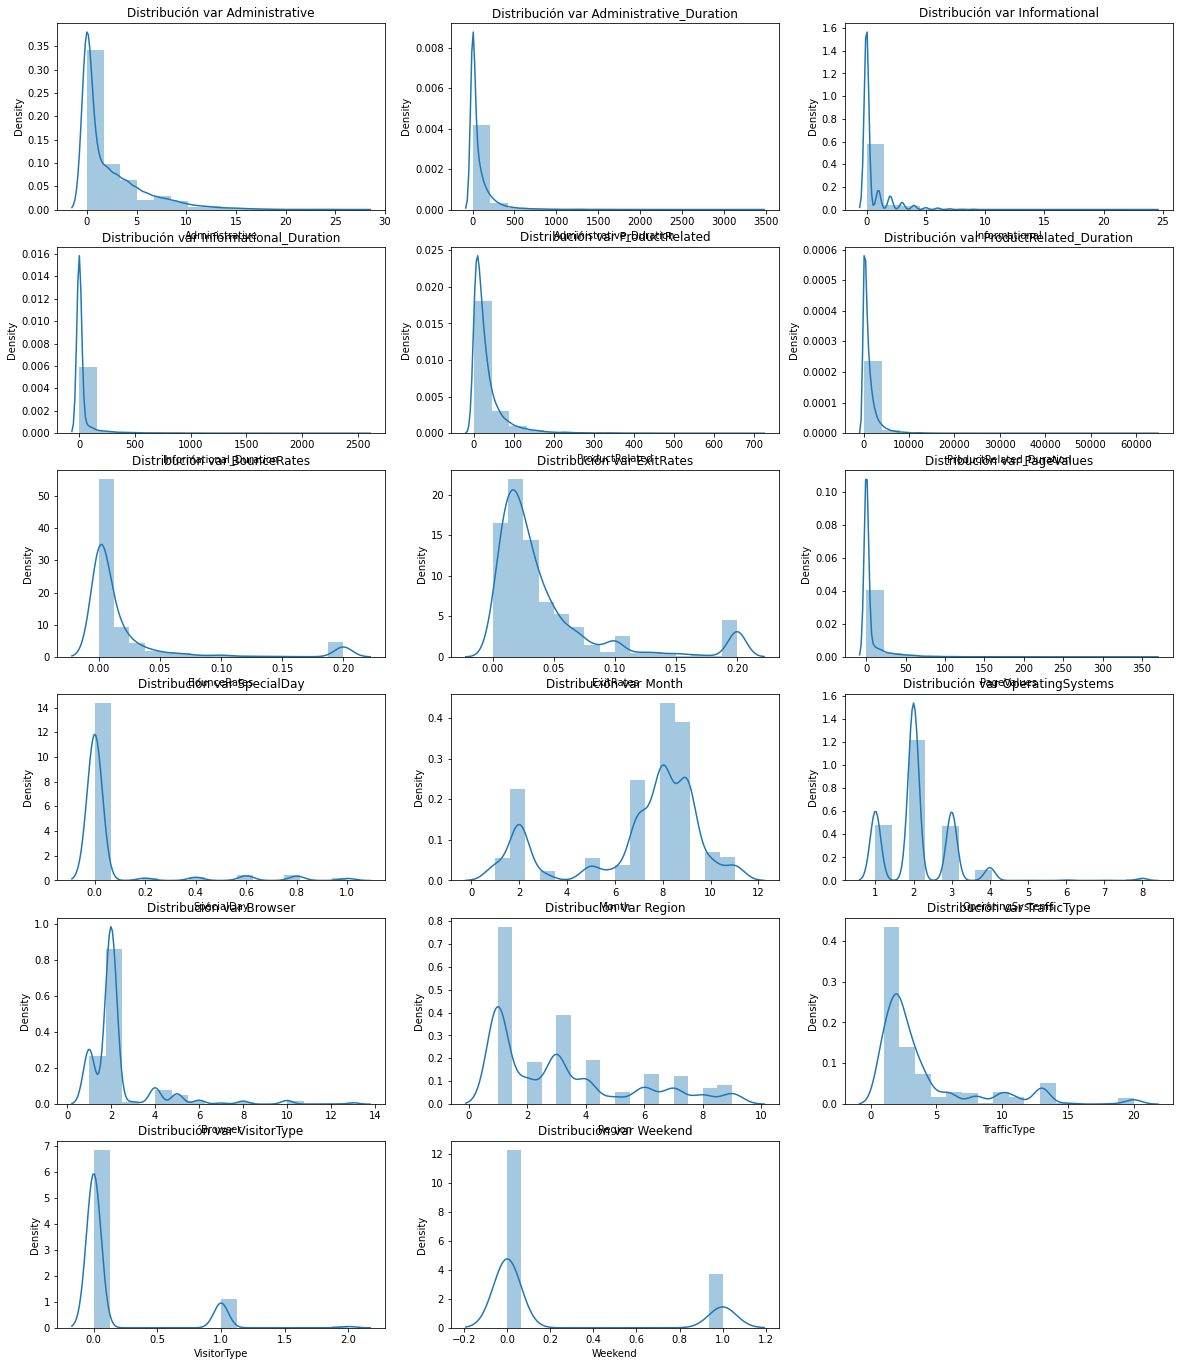

In [35]:
plt.figure(figsize=(20,24))
n = 0
for i, column in enumerate(X.columns):
    n+=1
    plt.subplot(6, 3, n)
    sns.distplot(X[column], bins=16)
    plt.title('Distribución var {}'.format(column))
plt.show()

#### Relación variable vs target:   
Queremos ver la relacion de las variables con la caracteristica target


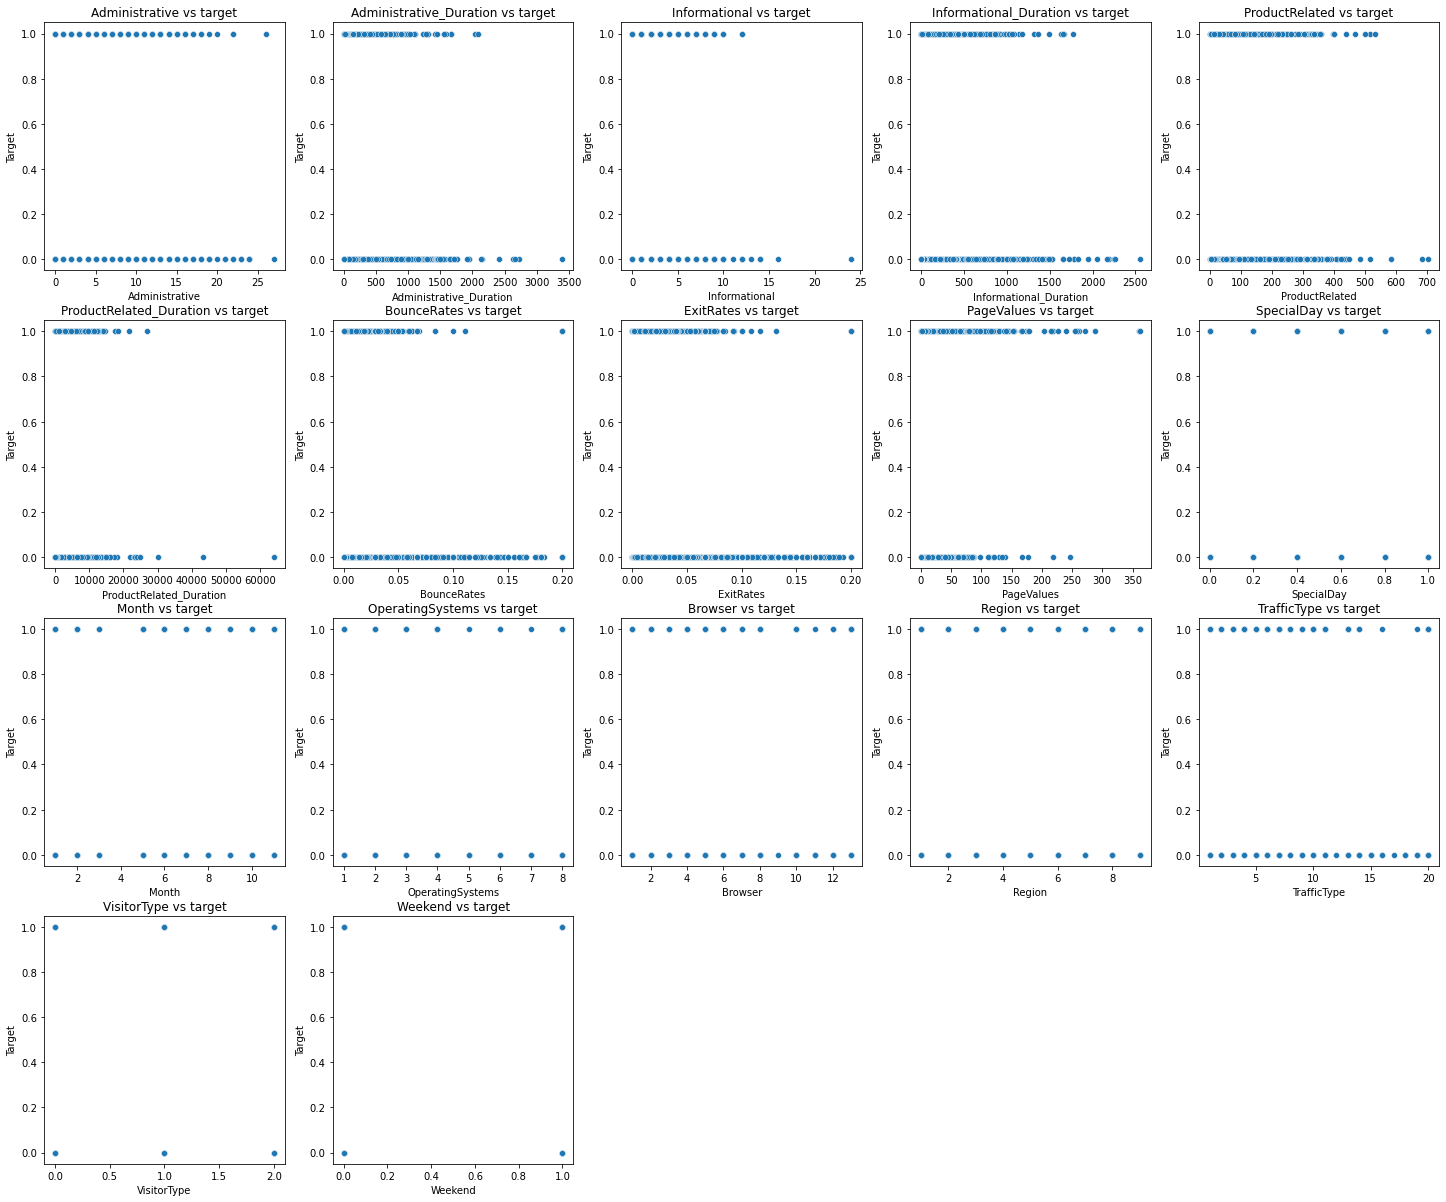

In [36]:
relaciones_vs_target(X, Y)

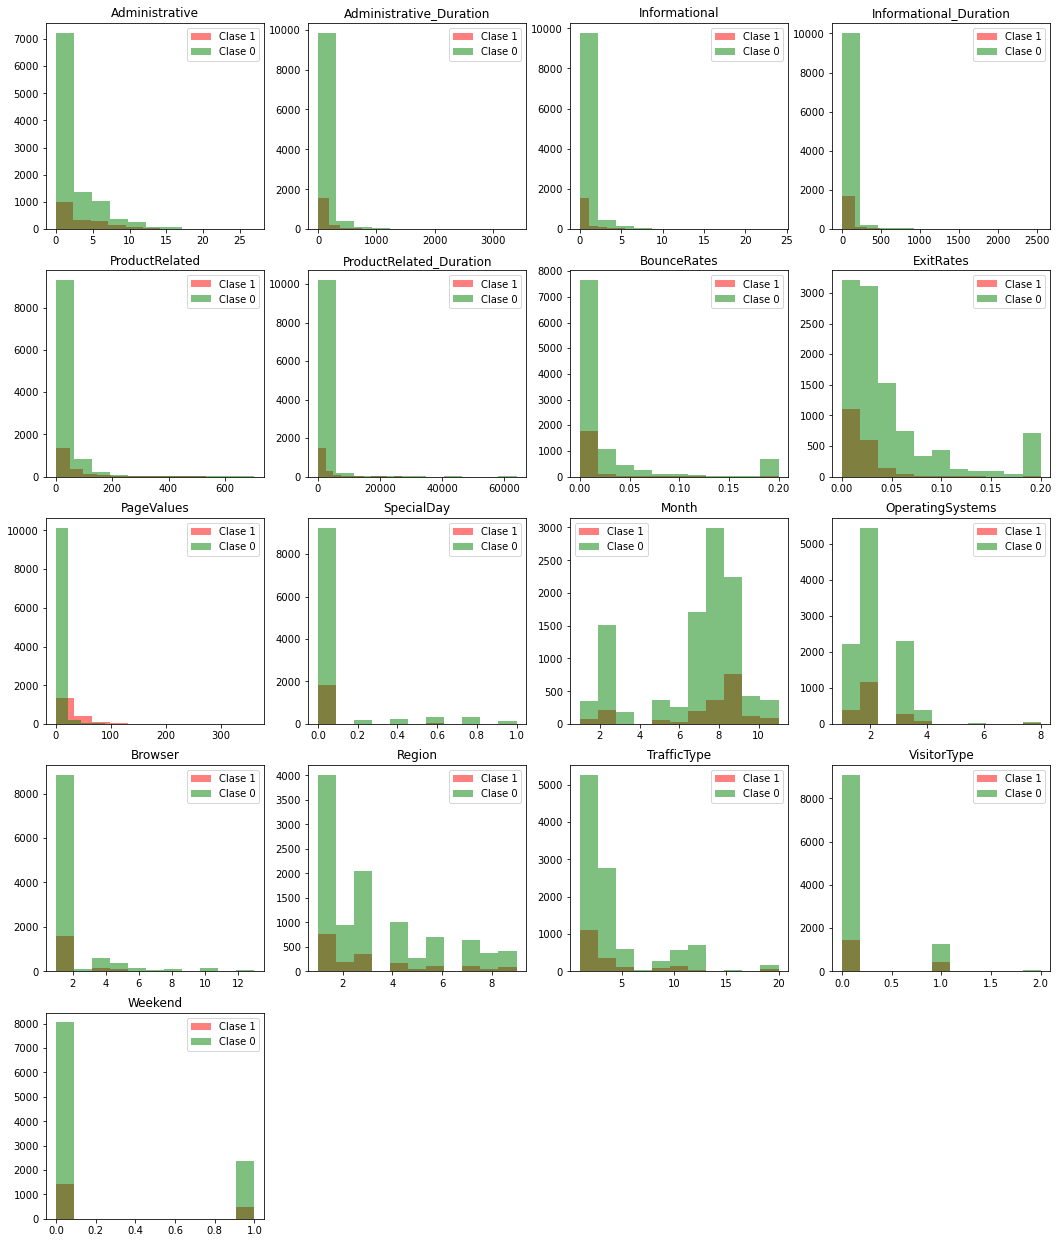

In [37]:
hist_pos_neg_feat(X,Y)

### Matriz de correlaciones:


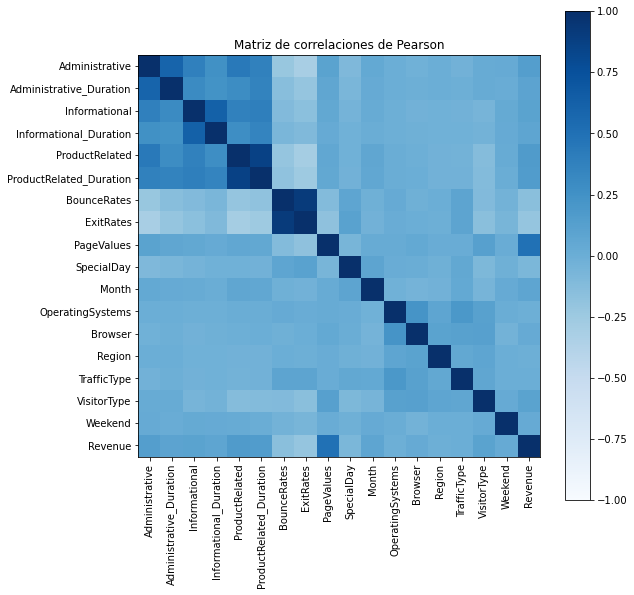

In [38]:
matriz_correlaciones = df1.corr(method='pearson')
n_ticks = len(df1.columns)
plt.figure( figsize=(9, 9) )
plt.xticks(range(n_ticks), df1.columns, rotation='vertical')
plt.yticks(range(n_ticks), df1.columns)
plt.colorbar(plt.imshow(matriz_correlaciones, interpolation='nearest', 
                            vmin=-1., vmax=1., 
                            cmap=plt.get_cmap('Blues')))
_ = plt.title('Matriz de correlaciones de Pearson')

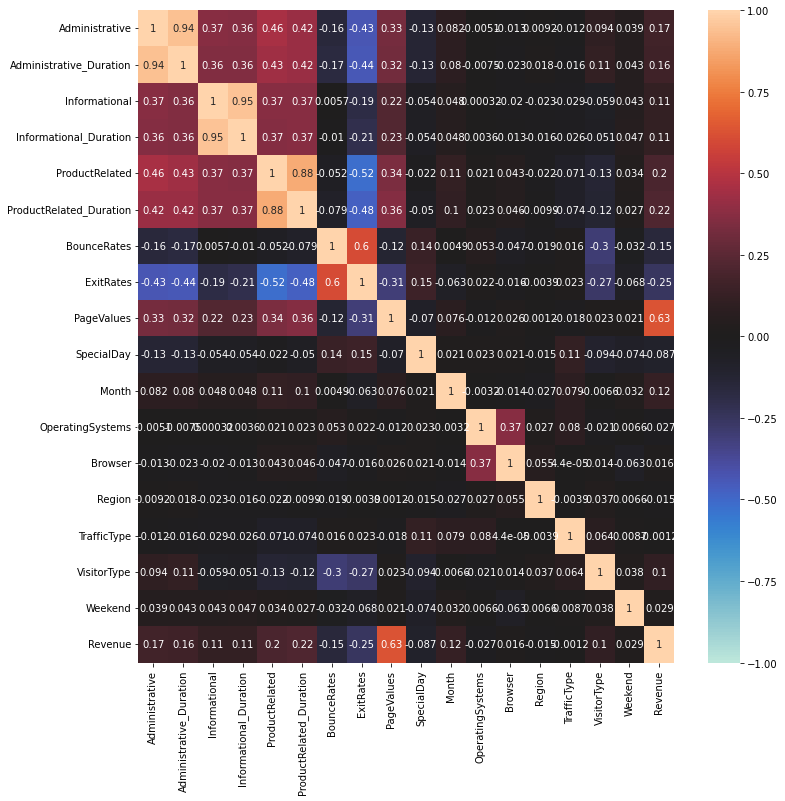

In [39]:
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(df1.corr(method='spearman'),annot=True,vmin=-1, vmax=1, center= 0)
plt.show()

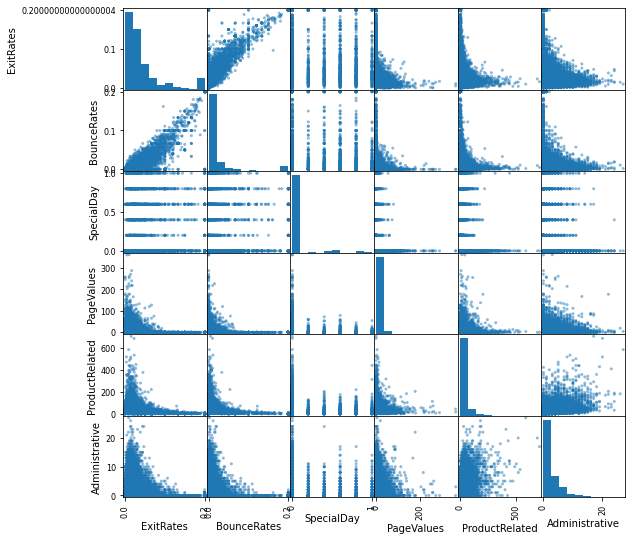

In [40]:
# Seleccionar las variables deseadas del DataFrame df1
variables = ['ExitRates', 'BounceRates', 'SpecialDay', 'PageValues', 'ProductRelated', 'Administrative']

# Crear la matriz de dispersión con las variables seleccionadas
scatter_matrix(df1[variables], figsize=(9, 9))
plt.show()

### **Variables con mayor correlación con la target:** 
 
Este paso es importante en vista que las variables con alta o mediana correlación tanto postiva como negativa, con la variable objetivo (target)  a menudo se utilizan como características importantes en el modelo, esto para utilizar aquellas que mejor apoyen al proceso de calculo, ya que pueden tener un mayor impacto en la capacidad del modelo para hacer predicciones precisas y mejores resultados.


In [41]:
correlaciones_target = matriz_correlaciones.values[ -1, : -1]
indices_inversos =  abs(correlaciones_target[ : ]).argsort()[ : : -1]
diccionario = {}
for nombre, correlacion in zip( X.columns[indices_inversos], list(correlaciones_target[indices_inversos] ) ):
    diccionario[nombre] = correlacion
pd.DataFrame.from_dict(diccionario, orient='index', columns=['Correlación con la target'])

,Correlación con la target
PageValues,0.492569
ExitRates,-0.206669
ProductRelated,0.158405
ProductRelated_Duration,0.152258
BounceRates,-0.150401
Administrative,0.138797
VisitorType,0.098485
Informational,0.095260
Administrative_Duration,0.093576
SpecialDay,-0.082305


### **Basado en la tabla anterior** 

* **Variables con baja correlación absoluta:** 
Variables como 'Weekend', 'Browser', 'OperatingSystems', 'Region' y 'TrafficType' tienen correlaciones cercanas a cero con la variable objetivo.
* **Variables con correlación negativa moderada:** 'ExitRates', 'BounceRates' y 'SpecialDay' tienen correlaciones negativas con la variable objetivo. 
* **Variables con correlación negativa moderada:** 'ExitRates', 'BounceRates' y 'SpecialDay' tienen correlaciones negativas con la variable objetivo. 

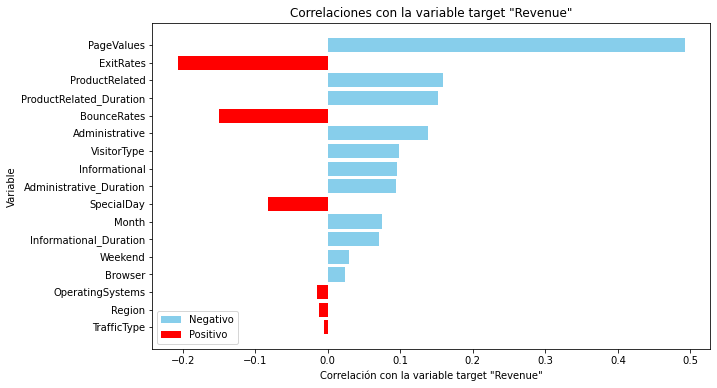

In [42]:
# Definir los datos para el gráfico de barras
nombres_columnas = list(diccionario.keys())
correlaciones = list(diccionario.values())

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.barh(nombres_columnas, correlaciones, color=['red' if c < 0 else 'skyblue' for c in correlaciones])
plt.xlabel('Correlación con la variable target "Revenue"')
plt.ylabel('Variable')
plt.title('Correlaciones con la variable target "Revenue"')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la variable más correlacionada en la parte superior

# Añadir una leyenda para las barras de color rojo y azul
plt.legend(handles=[bars[0], bars[-1]], labels=['Negativo', 'Positivo'])

plt.show()

El grafico anterior nos permite ver de forma mas sencilla la reslaciones de las variales con la targeet, tanto las que tiene correlacion positiva como negativa

### **Estandarización de los datos previa:**
Esto se procede a aplica segun lo visto en el curso, detalle : Como se comenta en la unidad, hay modelos que parten de la hipótesis que los datos son centrados y, por tanto, se necesita estandarizar. Suele ser una buena práctica porque no suele perjudicar.

Además, la inversa se puede realizar de forma sencilla.

In [43]:
obj_escalar = StandardScaler()
X_estandarizado = obj_escalar.fit_transform(X)

**División en train y test:**   Esta división consiste en separar los datos disponibles en dos conjuntos distintos: uno para entrenar el modelo (conjunto de entrenamiento) y otro para evaluar su rendimiento (conjunto de prueba), con esto se busca mejorar el rendimiento del modelo, debido a que ayuda a mejorar la generalización del modelo y su aplicabilidad en situaciones del mundo real.

**Recordar** que el conjunto de test NUNCA se usa para ajustar los modelos. Es un conjunto que se separa y se valida al final del todo para obtener una métrica.


In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X_estandarizado, Y, test_size=0.2, random_state=0)


### Model 1 : Aplicamos un modelo de regresión logística / Aplicamos un modelo de clasificación lineal



In [45]:
modelo = LogisticRegression()
parametros = {"C": [0., 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,0.09], 
              "class_weight":['balanced', None]}

In [46]:
modelo_gs = GridSearchCV(modelo, param_grid=parametros,
                         cv = 5, scoring='roc_auc')
modelo_gs.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,
                               0.08, 0.09],
                         'class_weight': ['balanced', None]},
             scoring='roc_auc')

In [47]:
print(modelo_gs.best_params_, "\nROC AUC: {}".format(round(modelo_gs.best_score_,2)))

{'C': 0.09, 'class_weight': 'balanced'} 
ROC AUC: 0.89


In [48]:
df_search = pd.DataFrame.from_dict(modelo_gs.cv_results_)

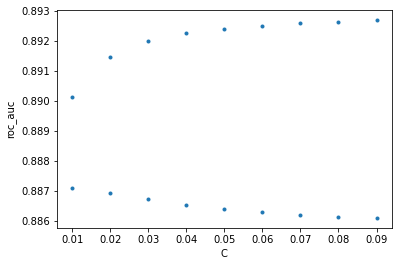

In [49]:
plt.xlabel('C')
plt.ylabel('roc_auc')
_ = plt.plot( df_search['param_C'], df_search['mean_test_score'], '.')

**Analizando el modelo con el mejor alpha**  : Al analizar el modelo con el mejor alpha, se busca determinar el equilibrio óptimo entre la capacidad de ajuste a los datos de entrenamiento y la capacidad de generalización a datos nuevos


In [50]:
reg_log =  LogisticRegression(C=modelo_gs.best_params_['C'],
                              class_weight=modelo_gs.best_params_['class_weight'])

In [51]:
reg_log.fit(X_train, Y_train)

LogisticRegression(C=0.09, class_weight='balanced')

In [52]:
y_test_pred_prob = reg_log.predict_proba(X_test)
y_test_pred_prob_pos = y_test_pred_prob[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg = y_test_pred_prob[np.where(Y_test == 0)[0]]

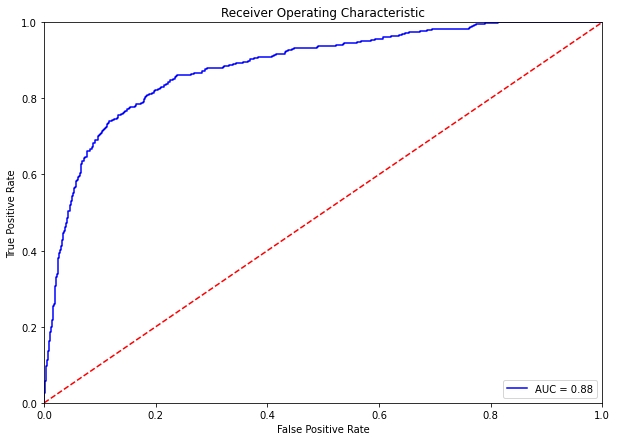

In [53]:
preds = y_test_pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

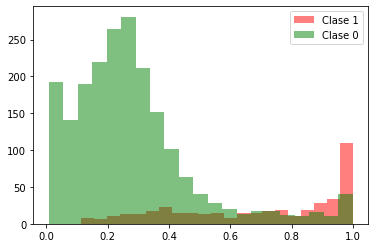

In [54]:
represento_doble_hist(y_test_pred_prob_pos[:, 1], y_test_pred_prob_neg[:, 1], n_bins=21, density=0)


In [55]:
umbral = 0.6
y_umbralizadas = 1*(y_test_pred_prob[:, 1] > umbral)

In [56]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_umbralizadas),2)))  
print("Sensitividad\t{}".format(round(metrics.recall_score(Y_test, y_umbralizadas),2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, y_umbralizadas),2))) 

Matriz de confusión
 [[1898  146]
 [ 151  271]]

Accuracy	0.88
Sensitividad	0.64
Precisión	0.65


### **Modelo #2 Aplicación de un modelo de redes neuronales**


In [57]:
modelo = MLPClassifier()
parametros = {'solver': ['lbfgs'], 
              'max_iter': [50,100,150,200], # Iteraciones máximas en cada red
              'alpha': 10.0 ** -np.arange(1, 10), # Parámetro de regularización L2 para evitar sobreajuste
              'hidden_layer_sizes':np.arange(30, 35), # Número de neuronas en cada capa
              'random_state':[0]}

In [58]:
modelo_gs = GridSearchCV(modelo, param_grid=parametros, cv = 3, 
                         scoring='roc_auc', n_jobs=-1, verbose=10)
modelo_gs.fit(X_train, Y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09]),
                         'hidden_layer_sizes': array([30, 31, 32, 33, 34]),
                         'max_iter': [50, 100, 150, 200], 'random_state': [0],
                         'solver': ['lbfgs']},
             scoring='roc_auc', verbose=10)

In [59]:
print(modelo_gs.best_params_, "\nROC AUC: {}".format(round(modelo_gs.best_score_,2)))


{'alpha': 0.001, 'hidden_layer_sizes': 30, 'max_iter': 50, 'random_state': 0, 'solver': 'lbfgs'} 
ROC AUC: 0.9


**Mejores parámetros:**


In [60]:
mejor_modelo = MLPClassifier(**modelo_gs.best_params_, verbose=10)


In [61]:
mejor_modelo.fit(X_train, Y_train)


MLPClassifier(alpha=0.001, hidden_layer_sizes=30, max_iter=50, random_state=0,
              solver='lbfgs', verbose=10)

**Análisis de las predicciones:**


In [62]:
y_test_pred_prob = mejor_modelo.predict_proba(X_test) 
y_test_pred_prob_pos = y_test_pred_prob[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg = y_test_pred_prob[np.where(Y_test == 0)[0]]

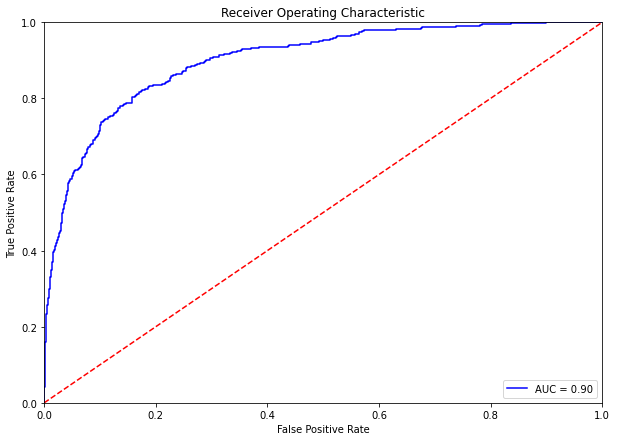

In [63]:
preds = y_test_pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

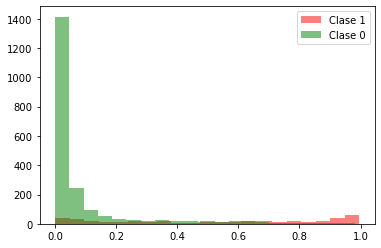

In [64]:
represento_doble_hist(y_test_pred_prob_pos[:, 1], y_test_pred_prob_neg[:, 1], n_bins=21)

**Umbralizo las predicciones:**


In [65]:
umbral = 0.5
y_umbralizadas = 1*(y_test_pred_prob[:, 1] > umbral)

In [66]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_umbralizadas),2)))  
print("Sensitividad\t{}".format(round(metrics.recall_score(Y_test, y_umbralizadas),2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, y_umbralizadas),2)))  

Matriz de confusión
 [[1958   86]
 [ 183  239]]

Accuracy	0.89
Sensitividad	0.57
Precisión	0.74


### Modelo #3 Árboles de decisión

In [67]:
df1.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

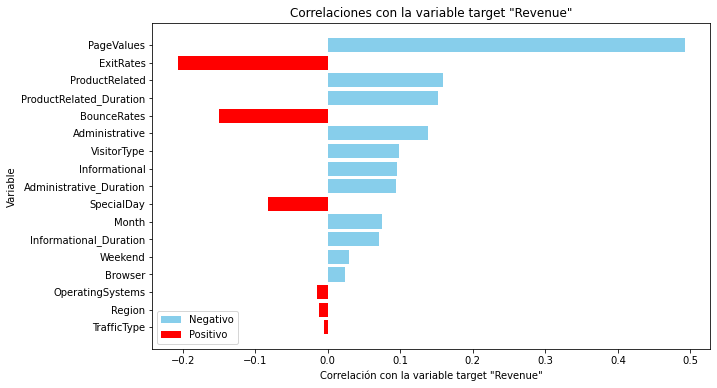

In [68]:
# Definir los datos para el gráfico de barras
nombres_columnas = list(diccionario.keys())
correlaciones = list(diccionario.values())

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.barh(nombres_columnas, correlaciones, color=['red' if c < 0 else 'skyblue' for c in correlaciones])
plt.xlabel('Correlación con la variable target "Revenue"')
plt.ylabel('Variable')
plt.title('Correlaciones con la variable target "Revenue"')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la variable más correlacionada en la parte superior

# Añadir una leyenda para las barras de color rojo y azul
plt.legend(handles=[bars[0], bars[-1]], labels=['Negativo', 'Positivo'])

plt.show()

In [69]:
df1.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int32
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                      int64
Revenue                      int64
dtype: object

In [70]:
X = df1[['PageValues', 'ProductRelated']]  # en este caso se eligen dos caracteristicas predictivas.
Y = df1['Revenue']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [72]:
clf= DecisionTreeClassifier(max_depth =5, random_state=0)

In [73]:
#entrenamiento del modelo
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [74]:
from sklearn import tree   # este codigo tomado de una asignacion de arboles de decision Richard Douglas G. 
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 6.46
|   |--- feature_0 <= 0.03
|   |   |--- feature_1 <= 80.50
|   |   |   |--- feature_1 <= 53.50
|   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  53.50
|   |   |   |   |--- feature_1 <= 58.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  58.50
|   |   |   |   |   |--- class: 0
|   |   |--- feature_1 >  80.50
|   |   |   |--- feature_1 <= 84.50
|   |   |   |   |--- feature_1 <= 82.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  82.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  84.50
|   |   |   |   |--- feature_1 <= 144.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  144.00
|   |   |   |   |   |--- class: 0
|   |--- feature_0 >  0.03
|   |   |--- feature_0 <= 0.14
|   |   |   |--- class: 1
|   |   |--- feature_0 >  0.14
|   |   |   |--- feature_1 <= 14.50

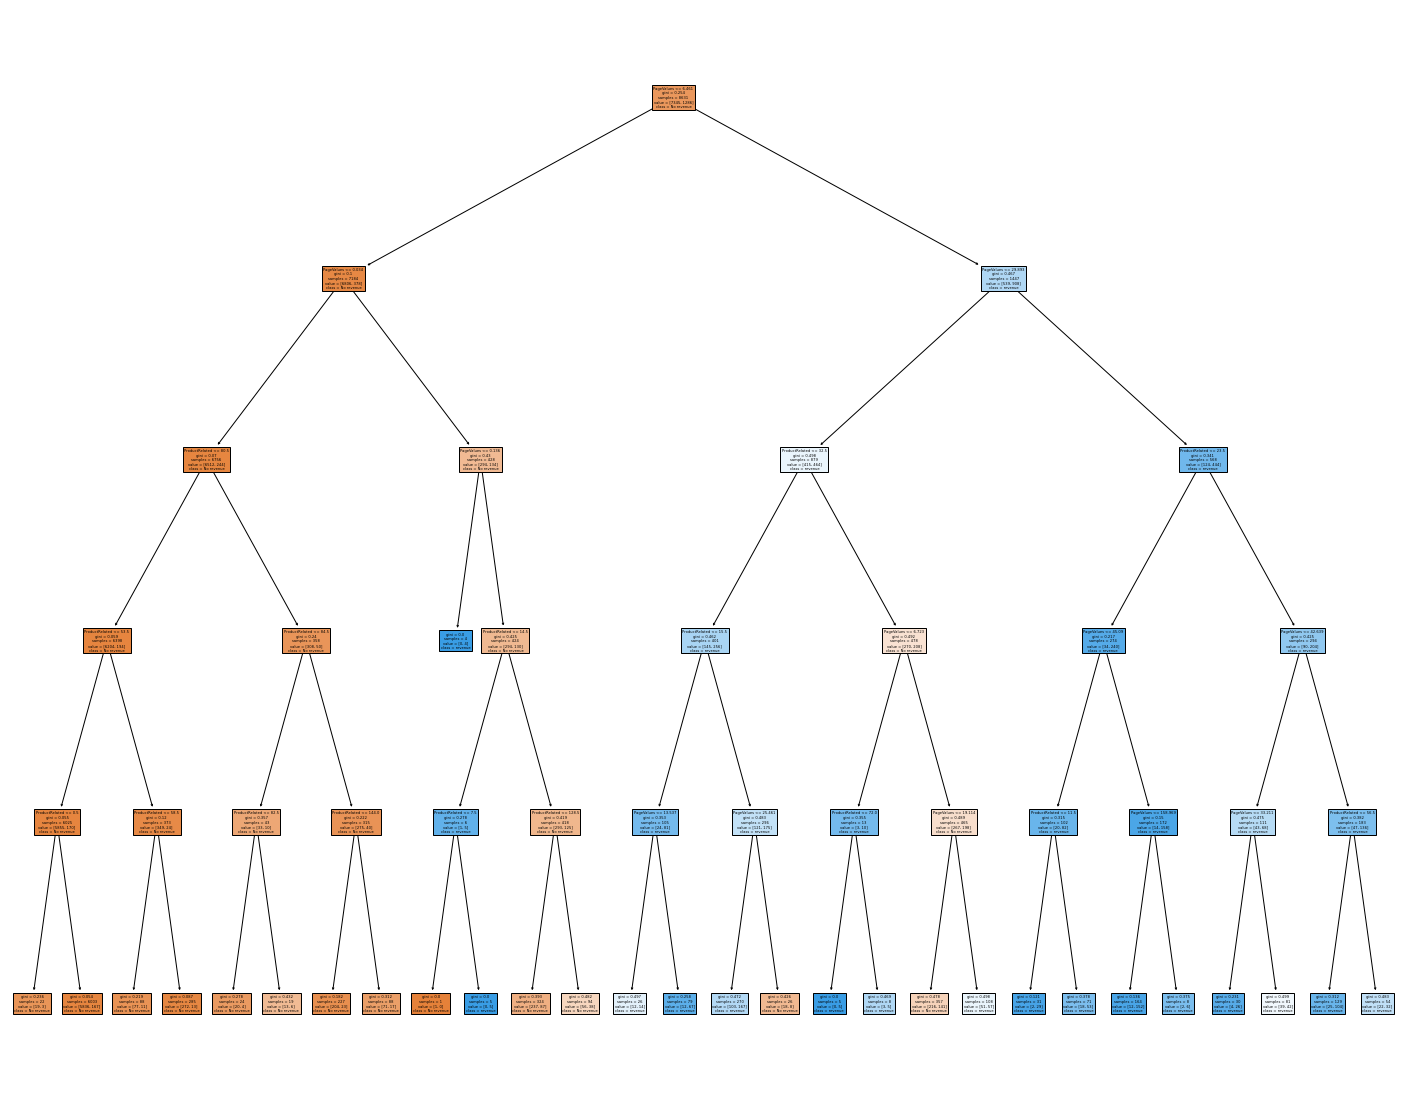

In [75]:
import matplotlib.pyplot as plt  # este codigo ejemplo tomado de una asignacion realizada sobre arboles decision
fig = plt.figure(figsize=(25,20))
feature=['PageValues','ProductRelated']
target=["No revenue","revenue"]

arbol= tree.plot_tree(clf, feature_names=feature,class_names=target,filled=True)

In [76]:
from sklearn import metrics

#realizar una prediccion 
y_pred = clf.predict(X_test)

print("Precision del Modelo:" , metrics.accuracy_score(y_test, y_pred))

Precision del Modelo: 0.8802379021357124


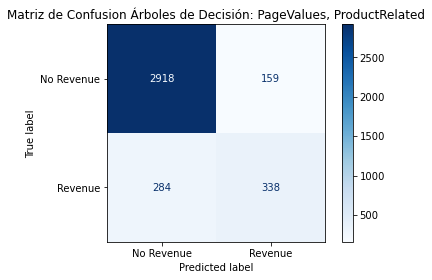

In [77]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

disp = plot_confusion_matrix(clf, X_test, y_test,
                            display_labels=["No Revenue", "Revenue"],
                            cmap=plt.cm.Blues)

disp.ax_.set_title("Matriz de Confusion Árboles de Decisión: PageValues, ProductRelated")
plt.show();

In [78]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(y_test, y_pred))  # se presenta los resultados del arbol decision
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(y_test, y_pred),2)))  
print("Sensitividad\t{}".format(round(metrics.recall_score(y_test, y_pred),2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(y_test, y_pred),2)))  

Matriz de confusión
 [[2918  159]
 [ 284  338]]

Accuracy	0.88
Sensitividad	0.54
Precisión	0.68


### **Resultados**

* **Variables con baja correlación absoluta:** 
Variables como 'Weekend', 'Browser', 'OperatingSystems', 'Region' y 'TrafficType' tienen correlaciones cercanas a cero con la variable objetivo.
* **Variables con correlación negativa moderada:** 'ExitRates', 'BounceRates' y 'SpecialDay' tienen correlaciones negativas con la variable objetivo. 
* **Variables con correlación negativa moderada:** 'ExitRates', 'BounceRates' y 'SpecialDay' tienen correlaciones negativas con la variable objetivo. 

**Accuracy de Modelos**

* Modelo 1 - **Model 1 : Aplicamos un modelo de regresión logística**
    * Accuracy	0.88
    * Sensitividad	0.64
    * Precisión	0.65

* Modelo 2 - **Modelo 2 Aplicación de un modelo de redes Neuronales**
    * Accuracy	0.89
    * Sensitividad	0.57
    * Precisión	0.74
* Modelo 3 - **Modelo 3 Árboles de decisión**
    * Accuracy	0.88
    * Sensitividad	0.54
    * Precisión	0.68

**Cual modelo elegir? La decision que todo Analista, Datascientist, Empresa debe enfrentar.**

La decisión de cual modelo usar o elegir no solo se debe basar en los resultados de accuracy, sino también las posibilidades económicas de una empresa, puede que un modelo brinde el mejor accurasy pero su aplicación en términos de costo sea imposible, po lo que se debe buscar un balance entre el costo/beneficio, en lo que respecta al uso o eleccion de un modelo en si, en mi preferencia me quedo con la regresion logistica, por un tema de aplicacion, costo-beneficio, y facil interpretacion, el mismo puede dar un resultado que se acerque a lo que una empresa busca y con dicho resultado decidir que otro modelo puede aplicar segun la disponibilida de los recursos, esto debido a que en función de costo/beneficio, cuando pensamos en la regresión logística esta nos resenta una opción más eficiente en términos de recursos computacionales (costo) y tiempo de entrenamiento (facilidad), por otra parte los árboles de decisión son un buen equilibrio entre resultados y rendimiento. Finalmente tenemos las redes neuronales (NeuralNetwork) las cuales pueden ofrecer el mejor rendimiento en términos de precisión, pero requieren más recursos y esfuerzo para su implementación y ajuste.

IMF Master en Business Analytics & Data Science Estudiante: **Richard Douglas Grijalba. modalidad virtual**. Costa Rica, pura vida.

Asignacion realizada utilizando codigo ejemplo y material suministrado por IMF, asi tambien investigacion propia sobre casos y aplicaciones de modelos de clasificacion, asignaciones previas o cursos introductorios a Modelos de Clasificacion tomados por el estudiante.

El datset suministrado por IMF, funciones casos y ejemplos vistos en el curso de Aprendizajes Automatico Modulo VI.